In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

[[2 2 2 2]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [3 3 3 3]]


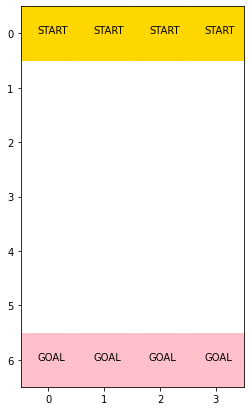

In [2]:
#MAP_WIDTH = 4
#MAP_HEIGHT =6

MAP_WIDTH = 4 #3,4,5
MAP_HEIGHT = 7



MAP_COLOR = [
    'white',# 0: Road 通過可能、報酬なし
    'black',# 1: Wall 通ることができない
    'gold' ,# 2: Goal 着いたら報酬を得て終了
    'pink',
    'blue'
]

MAP=np.zeros((MAP_HEIGHT,MAP_WIDTH),dtype = int)
MAP=np.array(MAP)
MAP[0]=2
MAP[MAP_HEIGHT-1]=3

print(MAP)

# MAPの定義
#MAP = np.array([
                #[2,2,2],
                #[0,0,0],
                #[3,3,3]
                #])


# マップの表示設定
fig = plt.figure(figsize=(MAP_WIDTH,MAP_HEIGHT))
ax = plt.gca()
plt.xlim(-0.5,MAP_WIDTH-0.5)
plt.ylim(MAP_HEIGHT-0.5,-0.5)
for i in range(MAP_HEIGHT):
    for j in range(MAP_WIDTH):
      plt.plot(j,i, marker='s', color = MAP_COLOR[MAP[i][j]], markersize=55)
      if(MAP[i][j]==2):
          plt.text(j-0.2,i,'START')
      if(MAP[i][j]==3):
        plt.text(j-0.2,i,'GOAL')
#img=plt.plot([1.5,1.5],[5.5,6.5],color='blue',linewidth=2)

In [3]:
#Player = [2,4] #エージェントのスタート位置

Player = [1,MAP_HEIGHT-2]

enemy = [ ]

enemy_s=0

#episode=50

r_e=0

#敵の状態の数
MA_STATE_NUM=MAP_HEIGHT*MAP_WIDTH
MB_STATE_NUM=MAP_HEIGHT*MAP_WIDTH

# 状態と位置に関する関数

#エージェント関連
# エージェント(敵)の位置からサブ状態番号に変換
def pos_to_substate(pos):
    return MAP_HEIGHT*pos[0]+pos[1]

# エージェント(敵)のサブ状態番号から位置を抽出
def agent_substate_to_pos(sa):
    return [sa//MAP_HEIGHT,sa%MAP_HEIGHT]

# 総合状態番号関連
# 各サブ状態番号から状態番号を計算
def substates_to_state(sa, sma,smb):
  
    return sa*MA_STATE_NUM*MB_STATE_NUM + sma*MB_STATE_NUM + smb

# 状態番号から各サブ状態番号を抽出
def state_to_substates(s):
    
    return [s//(MA_STATE_NUM*MB_STATE_NUM),(s%(MA_STATE_NUM*MB_STATE_NUM))//MB_STATE_NUM,s%MB_STATE_NUM]






In [4]:
# 位置から状態番号に変換
def pos_to_state(pos):
    return MAP_HEIGHT*pos[0]+pos[1]

# 状態番号から位置を抽出
def state_to_pos(state):
    return [state//MAP_HEIGHT,state%MAP_HEIGHT]



#Player = [MAP_HEIGHT-1,MAP_WIDTH/2] #エージェントのスタート位置



for i in range(MAP_HEIGHT):
    r_wx = random.randint(0,MAP_HEIGHT-1)
    enemy.append([r_wx,0])#敵のスタート位置

print("enemy action!")

enemy2 =[]
enemy3 =[]

#e_pos=np.array([[0,0],[1,0],[2,0],[3,0]])

#e_pos=np.array([[0,0],[1,0]])
e_pos=[]

for i in range(MAP_WIDTH):
  e_pos.append([i,0])

print(e_pos)

for i in enemy:
  print(i)
  enemy3.append(i)
  enemy2.append(pos_to_state(i))



enemy action!
[[0, 0], [1, 0], [2, 0], [3, 0]]
[5, 0]
[6, 0]
[4, 0]
[1, 0]
[2, 0]
[2, 0]
[3, 0]


In [5]:
def is_movable(pos):
    x = pos[0]
    y = pos[1]
    if x < 0 or x > MAP_WIDTH - 1:
        return False
    if y < 0 or y > MAP_HEIGHT - 1:
        return False

    if MAP[y][x] == 1:
        return False

    #if MAP[y][x] == 3:#goal４方向、８方向のみ適用
        #return False

    return True

  # 座標 pos = [x, y] がホールか判定する関数
def is_goal(pos):
    x = pos[0]
    y = pos[1]

    #print(x)
    #print(y)
    
    if MAP[y][x]==3:
        print("goal!")
        
        return True
    else:
      return False

def clash_enemy(s,e):
  
  [sa, sma,smb] = state_to_substates(s)
  user=agent_substate_to_pos(sa)
  x=user[0]
  y=user[1]
  [e_x,e_y] =state_to_pos(e)
  

  if x == e_x and y == e_y:
    return True
  else:
    return False

# 状態と行動に関する関数


# epsilon-greedy法による行動選択
def get_action(s, Q, epsilon):
    num_actions = Q.shape[1]
    if np.random.rand() < epsilon:
        a_next = np.random.choice(range(num_actions))
    else:
        a_next = np.argmax(Q[s,:])
        #print(a_next)
    return a_next

# 次の状態の決定
def get_s_next(s, a,sma_next,smb_next):
    [sa, sma,smb] = state_to_substates(s)
    user=agent_substate_to_pos(sa)
    x=user[0]
    y=user[1]
   # r = random.randint(1,10)

  
    #print("take")
    print("a:"+str(a))
    if a == 0: #left
      x = x - 1
    elif a == 1: #right
      x = x + 1
    elif a == 3: #back
      y=y+1
    elif a == 4: # front
      y=y-1

    if is_movable([x, y]): #移動可能な場合のみ移動
        
      return substates_to_state(pos_to_substate([x, y]),sma_next,smb_next)
        #return pos_to_state([x, y])
    else:
      return substates_to_state(pos_to_substate([user[0], user[1]]),sma_next,smb_next)


e_snum=0

# モンスターAの次の状態の決定
def get_sma_next(sa,sma,STEP):##STEPはいらない

  global e_snum

  [sx,sy]=agent_substate_to_pos(sa)
  [x,y]=agent_substate_to_pos(sma)
  Y=y+1
  X=x
  
  if sx==x and sy==y:
    
    e_snum=np.random.choice(MAP_WIDTH)
    #return pos_to_substate(e_pos[r])
    return [pos_to_substate(e_pos[e_snum]),"A"]

  if Y>=MAP_HEIGHT:
    #e_snum=e_snum+1
    #if e_snum>=MAP_WIDTH:
      #e_snum=0
    e_snum=np.random.choice(MAP_WIDTH)
    #return pos_to_substate(e_pos[e_snum])
    return [pos_to_substate(e_pos[e_snum]),"B"]
  else:
    #return pos_to_substate([X,Y])
    return [pos_to_substate([X,Y]),"C"]



In [6]:
# モンスターBの次の状態の決定
def get_smb_next(sa,smb,flag):

  global e_snum,st,dir# dir=0 right dir=1 left

  [sx,sy]=agent_substate_to_pos(sa)
  [x,y]=agent_substate_to_pos(smb)
  
  if y==0:
    Y=y+1
    #st=np.random.randint(0,2)
    #左固定
    st=1
    if st==0:
      X=x+1
      dir="right"
      if is_movable([X,Y])==False:
        X=x-1
        dir="left"
    else:
      X=x-1
      dir="left"
      if is_movable([X,Y])==False:
        X=x+1
        dir="right"

  else:
    Y=y+1
    if flag=="left":
      X=x-1
      dir="left"
      if is_movable([X,Y])==False:
      #if is_movable([X,Y])==False and is_goal([X,Y])==False:
        X=x+1
        dir="right"
    else:#flag==right
      X=x+1
      dir="right"
      if is_movable([X,Y])==False:
      #if is_movable([X,Y])==False and is_goal([X,Y])==False:
        X=x-1
        dir="left"



  #Y=y+1
  #X=x
  #print("count"+str(e_pos[STEP]))
  #X=e_pos[STEP][0]
  #print(str(STEP)+":"+str([X,Y]))

  if sx==x and sy==y:
  
    #e_snum=np.random.choice(MAP_WIDTH)
    #e_snum=1
    #左固定
    e_snum=np.random.randint(1,MAP_WIDTH)
    return [pos_to_substate(e_pos[e_snum]),"A",dir]

  if Y>=MAP_HEIGHT:

    #e_snum=np.random.choice(MAP_WIDTH)
    #e_snum=1
    #左固定
    e_snum=np.random.randint(1,MAP_WIDTH)
    return [pos_to_substate(e_pos[e_snum]),"B",dir]
  else:
    #return pos_to_substate([X,Y])
    return [pos_to_substate([X,Y]),"C",dir]

In [7]:
def is_movableII(pos): #エージェント用、４方向、８方向の時のみ適用
    x = pos[0]
    y = pos[1]
    if x < 0 or x > MAP_WIDTH - 1:
        return False
    if y < 0 or y > MAP_HEIGHT - 1:
        return False

    if MAP[y][x] == 1:
        return False

    if MAP[y][x] == 3:#goal４方向、８方向のみ適用
        return False

    return True

In [8]:
# Q学習関連の関数

e_list=[]

# Q学習本体
def Q_learning(s, a, r, s_next, Q, eta):
    [sa,sma,smb]=state_to_substates(s)
    [sa1,sma1,smb1] = state_to_substates(s_next)
    GAMMA = 0.9
  
    if clash_enemy(sa,sma) or clash_enemy(sa,smb):
        Q[s,a] = Q[s,a] + eta * (r - Q[s,a])
    else:
        Q[s,a] = Q[s,a] + eta * (r + GAMMA * np.max(Q[s_next,:]) - Q[s,a])
    return Q

# スタートからゴールまでのQ学習
def Q_learning_one_episode(Q, epsilon,eta,r_num):
  #初期位置等の設定
  #R=np.array([[1,-1],[1,0],[0,-1],[1,-5],[5,-1],[10,-5],[5,-10],[1,-10],[10,-1]])
  #R=np.array([[1,-1],[2,-1],[3,-1],[4,-1],[5,-1],[10,-1],[20,-1],[50,-1],[100,-1]])
  #R=np.array([[1,-1],[1,-2],[1,-5],[1,-10],[1,-20],[1,-50]])
  R=np.array([[1,-10],[10,-1],[5,-2],[2,-5],[math.sqrt(10),-math.sqrt(10)]])

  e_snum=np.random.choice(MAP_WIDTH)
  e_snum2=np.random.choice(MAP_WIDTH)
  #左固定
  #e_snum2=np.random.randint(1,MAP_WIDTH)

  s = substates_to_state(pos_to_substate(Player),pos_to_substate(e_pos[e_snum]),pos_to_substate(e_pos[e_snum2]))
  print("S:"+str(s))
  #s = pos_to_state(Player)
  a_next = get_action(s, Q, epsilon)
  history = [[s, np.nan]]

  #sma = enemy2[0]
  sma=pos_to_substate(e_pos[e_snum])
  smb=pos_to_substate(e_pos[e_snum2])

  r=0
  e_count=0

  flag = False

    #episode=50

  count=-1

  #最大100ステップの学習
  for step in range(100):
    r=0
   
    #今回の行動による状態遷移とその記録
    a = a_next
    
    history[-1][1] = a
    [sa1, sma1,smb1]= state_to_substates(s) 
    
    sma_next = get_sma_next(sa1,sma1,count)

    if step >=3:
      smb_next = get_smb_next(sa1,smb1,smb_next[2])# smb_next関数に変更。
      #smb_next = get_sma_next(sa1,smb1,count) #真っ直ぐにする場合
    else:
      smb_next = [smb,"C","stop"]
      #smb_next = [smb,"C"]#get_smaの時


    s_next = get_s_next(s,a,sma_next[0],smb_next[0])


  

    #報酬の調整

    #if sma_next[1] == "A":
    if sma_next[1] == "A" or smb_next[1] == "A":
      print("clash!!")
      #r=0
      #r=1   # r=0の場合も確認(A r=0 B=-1)
      r=R[r_num][0]
      e_count=e_count+1#敵を捕まえたとき

      
    #if sma_next[1] == "B":
    if sma_next[1] == "B" or smb_next[1] == "B":
      #e_count=e_count+1 #敵がゴールに入ったとき
      #r=-1  #(A r=1 B r=0)
      #r=-1
      r=R[r_num][1]

   
    

    history.append([s_next, np.nan])
    Q = Q_learning(s, a, r, s_next, Q, eta)
    print("r"+str(r))
    a_next = get_action(s_next, Q, epsilon)
    s = s_next
    #sma=sma_next[0]





  print(history)    
  return [history, Q, e_count]

In [9]:
# Q学習を実行

MAX_EPISODE =  2000 #最大学習エピソード回数
#num_states = MAP_HEIGHT*MAP_WIDTH*MAP_HEIGHT*MAP_WIDTH#状態最大数（エージェントの迷路での位置）
num_states = MAP_HEIGHT*MAP_WIDTH*MAP_HEIGHT*MAP_WIDTH*MAP_HEIGHT*MAP_WIDTH#状態最大数（エージェントの迷路での位置）
num_actions = 3 #左右の行動
Qtable = np.random.rand(num_states,num_actions) #Q関数のランダムな初期化

for episode in range(MAX_EPISODE):
    #epsilon = 0.5 / (episode + 1) #乱数行動の選択確率、徐々に減少,10/(episode+10)  11/8(メモ)
    epsilon = 10 / (episode + 10) # 学習を速くする
    eta = 0.1 #学習のステップ幅

    [history, Qtable, e_list] = Q_learning_one_episode(Qtable,epsilon,eta,0) #最後はr(報酬)指定
    print("number of steps:" + str(len(history)-1))

ストリーミング出力は最後の 5000 行に切り捨てられました。
a:1
r0
a:0
r0
a:0
clash!!
r1.0
a:1
r0
a:2
r0
a:1
clash!!
r1.0
a:2
r0
a:0
r0
a:2
clash!!
r1.0
a:2
r0
a:0
r0
a:0
clash!!
r1.0
a:1
r0
a:1
r0
a:1
clash!!
r1.0
a:0
r0
a:1
r0
a:2
clash!!
r1.0
a:1
r0
a:0
r0
a:0
clash!!
r1.0
a:1
r0
a:2
r0
a:1
clash!!
r1.0
a:1
r0
a:0
r0
a:2
clash!!
r1.0
a:2
r0
a:0
r0
a:0
clash!!
r1.0
a:2
r0
a:2
r0
a:0
r0
a:1
r-10.0
a:0
r0
a:2
clash!!
r1.0
a:1
r0
a:1
r0
a:1
r0
a:0
clash!!
r1.0
a:0
r0
a:2
clash!!
r1.0
a:2
r0
a:1
r0
a:1
r0
a:2
clash!!
r1.0
a:0
r0
a:1
clash!!
r1.0
a:1
r0
a:0
r0
a:2
r0
a:0
clash!!
r1.0
[[10003, 2], [10031, 1], [15547, 2], [15575, 2], [15597, 1], [21121, 2], [20989, 1], [21025, 0], [15559, 1], [21070, 1], [21092, 2], [21114, 2], [20786, 2], [20822, 2], [20858, 2], [20874, 2], [20896, 0], [15430, 1], [20786, 2], [20822, 2], [20858, 2], [20867, 1], [20889, 0], [15437, 1], [20793, 1], [20829, 0], [15363, 0], [9905, 1], [15415, 2], [15437, 1], [20387, 1], [20423, 0], [14971, 2], [15001, 0], [9535, 0], [4069, 2], [3923, 1],

In [10]:
##最終結果のアニメーションの表示
from matplotlib import animation
from IPython.display import HTML


def init():
    line.set_data([], [])
    e_line.set_data([], [])
    eb_line.set_data([], [])
    return(line,e_line,)


def animate(i):
    global count
    #[e_x,e_y]=enemy3[0]
    #print(history[i])
    state = history[i][0]
    print(state)
    [S1,em,emb]=state_to_substates(state)
    [x, y] = agent_substate_to_pos(S1)
    [e1,e2]=agent_substate_to_pos(em)
    [e3,e4]=agent_substate_to_pos(emb)
    e_line.set_data(e1,e2)
    eb_line.set_data(e3,e4)
    line.set_data(x, y)
    #e_line.set_data(e1,e2)
    #if  (i<MAP_HEIGHT*MAP_WIDTH):
      #if (i%MAP_HEIGHT)!=0:
        #e_y=i%MAP_HEIGHT
        #e_x=e_pos[i//MAP_HEIGHT][0]
      #else:
        #e_y=0
        #e_x=e_pos[i//MAP_HEIGHT][0]
      #e_line.set_data(e_x,e_y)
    #e_line.set_data(e1,e2)
      #[e_y,e_x] =enemy3[i]
      #e_line.set_data(e_x,e_y)
    #e_state = e_history[i][0]
    #[e_x,e_y] =state_to_pos(e_state)
    #e_line.set_data(e_x,e_y)
    #if (r_list[i-1]<=r_d):
      #img=ax.plot([1.5,1.5],[5.5,6.5],color='blue',linewidth=2)
    #else:
      #img=ax.plot([1.5,1.5],[5.5,6.5],color='red',linewidth=2)

    return(line,)

#最終経路の再計算
[history, final_Qtable, e_count] = Q_learning_one_episode(Qtable,0,0,0)


#アニメーション作成
line, = ax.plot([], [], marker='o', color='gold', markersize=40)
e_line, = ax.plot([], [], marker='o', color='blue', markersize=20)
eb_line, = ax.plot([], [], marker='o', color='violet', markersize=20)
#img=ax.plot([1.5,1.5],[5.5,6.5],color='blue',linewidth=2)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(history), interval=300, repeat=False)
HTML(anim.to_jshtml())

S:9996
a:1
r0
a:0
r0
a:0
r0
a:1
r0
a:1
r0
a:1
r0
a:1
r-10.0
a:2
r0
a:1
r0
a:2
r-10.0
a:2
r0
a:0
r0
a:1
clash!!
r1.0
a:2
r0
a:1
r0
a:2
clash!!
r1.0
a:0
r0
a:1
r0
a:2
clash!!
r1.0
a:1
r0
a:0
r0
a:1
clash!!
r1.0
a:0
r0
a:1
r0
a:2
clash!!
r1.0
a:1
r0
a:0
r0
a:2
clash!!
r1.0
a:0
r0
a:2
r0
a:2
clash!!
r1.0
a:1
r0
a:1
r0
a:2
clash!!
r1.0
a:0
r0
a:1
r0
a:2
clash!!
r1.0
a:1
r0
a:0
r0
a:1
clash!!
r1.0
a:0
r0
a:1
r0
a:2
clash!!
r1.0
a:1
r0
a:0
r0
a:2
clash!!
r1.0
a:2
r0
a:0
r0
a:0
clash!!
r1.0
a:1
r0
a:1
r0
a:0
clash!!
r1.0
a:2
r0
a:1
r0
a:1
clash!!
r1.0
a:2
r0
a:2
r0
a:2
clash!!
r1.0
a:0
r0
a:2
r0
a:1
clash!!
r1.0
a:2
r0
a:0
r0
a:1
clash!!
r1.0
a:1
r0
a:2
r0
a:2
clash!!
r1.0
a:1
r0
a:1
r0
a:1
clash!!
r1.0
a:0
r0
a:0
r0
a:0
clash!!
r1.0
a:1
r0
a:1
r0
a:2
clash!!
r1.0
a:0
r0
a:2
r0
a:2
clash!!
r1.0
a:1
r0
a:1
r0
a:2
clash!!
r1.0
a:1
r0
a:2
r0
a:2
clash!!
r1.0
a:2
r0
a:0
r0
a:1
clash!!
r1.0
a:1
r0
a:2
r0
a:2
clash!!
r1.0
a:1
r0
a:1
r0
a:0
clash!!
r1.0
a:0
r0
a:0
r0
a:1
clash!!
r1.0
a:1
r0
a:1
r0
a:

In [13]:
# アニメーション作成と表示
anim.save('movie_defense5.mp4')
from google.colab import files
files.download('movie_defense5.mp4')

9814
15330
15358
20874
15408
15430
10006
15530
21054
15589
15611
21121
20387
20423
14971
9506
9528
4062
10006
15530
21054
21070
15604
21114
20394
14942
20466
14994
15016
9550
9586
14914
20438
20447
20469
15017
20541
20577
15307
20818
15352
15374
15410
15446
9630
15140
15169
20679
15213
9747
3931
3967
4003
9513
4047
4069
9411
3959
9483
15007
9527
4061
4125
4161
9685
15195
9723
9745
15493
21017
21053
15587
21091
21113
20981
21017
21053
15587
21098
21120
15094
9642
15166
20690
15218
9752
4118
9642
15166
20690
15211
9745
15101
15137
15173
15195
9737
9759
10005
15515
15551


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>